# Homework 3

## Part 1: Imbalanced Dataset
This part of homework helps you practice to classify a highly imbalanced dataset in which the number of examples in one class greatly outnumbers the examples in another. You will work with the Credit Card Fraud Detection dataset hosted on Kaggle. The aim is to detect a mere 492 fraudulent transactions from 284,807 transactions in total. 

### Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

Due Date : April 02, 2022

### Name: AAYUSH KUMAR VERMA

### UNI: av2955

## 0 Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

## 1 Data processing and exploration
Download the Kaggle Credit Card Fraud data set. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [ ]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 1.1 Examine the class label imbalance
Let's look at the dataset imbalance:

**Q1. How many observations are there in this dataset? How many of them have positive label (labeled as 1)?**

In [ ]:
# Your Code Here
print("Total Observations = ", len(raw_df))
positive = raw_df["Class"].sum()
print("Observations with Positive Label = ", positive)


Total Observations =  284807
Observations with Positive Label =  492


### 1.2 Clean, split and normalize the data
The raw data has a few issues. First the `Time` and `Amount` columns are too variable to use directly. Drop the `Time` column (since it's not clear what it means) and take the log of the `Amount` column to reduce its range.

In [ ]:
cleaned_df = raw_df.copy()

# You don't want the `Time` column.
cleaned_df.pop('Time')

# The `Amount` column covers a huge range. Convert to log-space.
eps = 0.001 # 0 => 0.1¢
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount')+eps)

**Q2. Split the dataset into development and test sets. Please set test size as 0.2 and random state as 42.**

In [ ]:
# Your Code Here

cleaned_df_x = cleaned_df.drop(["Class"], axis=1)
cleaned_df_y = cleaned_df["Class"]

cleaned_df_x_dev, cleaned_df_x_test, cleaned_df_y_dev, cleaned_df_y_test = train_test_split(cleaned_df_x, cleaned_df_y, test_size=0.2, random_state=42)

**Q3. Normalize the input features using the sklearn StandardScaler. Print the shape of your development features and test features.**

In [ ]:
# Your Code Here

standardScaler = StandardScaler()
cleaned_df_x_dev = standardScaler.fit_transform(cleaned_df_x_dev)
cleaned_df_x_test = standardScaler.transform(cleaned_df_x_test)

In [ ]:
print("Shape: Development Features = ", cleaned_df_x_dev.shape)
print("Shape: Test Features = ", cleaned_df_x_test.shape)

Shape: Development Features =  (227845, 29)
Shape: Test Features =  (56962, 29)


### 1.3 Define the model and metrics
**Q4. First, fit a default logistic regression model. Print the AUC and average precision of 5-fold cross validation.**

In [28]:
# Your Code Here
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score

In [33]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
weighted_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [ ]:
logisticRegression = LogisticRegression()
logisticRegression.fit(cleaned_df_x_dev, cleaned_df_y_dev)

LogisticRegression()

In [34]:
y_pred_proba = logisticRegression.predict_proba(cleaned_df_x_test)
fpr, tpr, thresholds = metrics.roc_curve(cleaned_df_y_test, y_pred_proba[:,1], pos_label=1)
result_table = result_table.append({'classifiers':"Logistic Regression",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':metrics.auc(fpr, tpr)}, ignore_index=True)

weighted_table = weighted_table.append({'classifiers':"Logistic Regression",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':metrics.auc(fpr, tpr)}, ignore_index=True)


In [39]:
from sklearn.model_selection import cross_validate

In [ ]:
score = cross_validate(logisticRegression, cleaned_df_x_dev, cleaned_df_y_dev, cv=5, scoring=['roc_auc','average_precision'])
print ("AUC of 5-fold CV = ", score['test_roc_auc'].mean())

AUC of 5-fold CV =  0.9737187470946873


In [ ]:
print ("Average Precision of 5-fold CV = ", score['test_average_precision'].mean())

Average Precision of 5-fold CV =  0.7608085616055361


**Q5.1. Perform random under sampling on the development set. What is the shape of your development features? How many  positive and negative labels are there in your development set? (Please set random state as 42 when performing random under sampling)**

In [ ]:
# Your Code Here
underSampler = RandomUnderSampler(random_state=42, sampling_strategy='auto')
x_under, y_under = underSampler.fit_resample(cleaned_df_x_dev, cleaned_df_y_dev)

print("Shape: X = ", x_under.shape)
print("Shape: Y = ", y_under.shape)

Shape: X =  (788, 29)
Shape: Y =  (788,)


In [ ]:
print("Positive Labels = ", y_under.sum())
print("Negative Labels = ", len(y_under) - y_under.sum())

Positive Labels =  394
Negative Labels =  394


**Q5.2. Fit a default logistic regression model using under sampling. Print the AUC and average precision of 5-fold cross validation. (Please set random state as 42 when performing random under sampling)**

In [ ]:
# Your Code Here
lr_under = LogisticRegression()
lr_under.fit(x_under, y_under)

LogisticRegression()

In [ ]:
pred_under_proba = lr_under.predict_proba(cleaned_df_x_test)
fpr, tpr, thresholds = metrics.roc_curve(cleaned_df_y_test, pred_under_proba[:,1], pos_label=1)
result_table = result_table.append({'classifiers':"Random Under Sampler",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':metrics.auc(fpr, tpr)}, ignore_index=True)


In [ ]:
pipeline = imb_make_pipeline(underSampler, lr_under)
score = cross_validate(pipeline, x_under, y_under, cv=5, scoring=['roc_auc','average_precision'])
print ("AUC of 5-fold CV = ", score['test_roc_auc'].mean())

AUC of 5-fold CV =  0.9754625121713728


In [ ]:
print ("Average Precision of 5-fold CV = ", score['test_average_precision'].mean())

Average Precision of 5-fold CV =  0.9809179697112904


**Q6.1. Perform random over sampling on the development set. What is the shape of your development features? How many positive and negative labels are there in your development set? (Please set random state as 42 when performing random over sampling)**

In [ ]:
# Your Code Here

overSampler = RandomOverSampler(random_state=42, sampling_strategy='auto')
x_over, y_over = overSampler.fit_resample(cleaned_df_x_dev, cleaned_df_y_dev)

print("Shape: X = ", x_over.shape)
print("Shape: Y = ", y_over.shape)

Shape: X =  (454902, 29)
Shape: Y =  (454902,)


In [ ]:
print("Positive Labels = ", y_over.sum())
print("Negative Labels = ", len(y_over) - y_over.sum())

Positive Labels =  227451
Negative Labels =  227451


**Q6.2. Fit a default logistic regression model using over sampling. Print the AUC and average precision of 5-fold cross validation. (Please set random state as 42 when performing random over sampling)**

In [ ]:
# Your Code Here
lr_over = LogisticRegression()
lr_over.fit(x_over, y_over)

LogisticRegression()

In [ ]:
pred_over_proba = lr_over.predict_proba(cleaned_df_x_test)
fpr, tpr, thresholds = metrics.roc_curve(cleaned_df_y_test, pred_over_proba[:,1], pos_label=1)
result_table = result_table.append({'classifiers':"Random Over Sampler",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':metrics.auc(fpr, tpr)}, ignore_index=True)


In [ ]:
pipeline = imb_make_pipeline(overSampler, lr_over)
score = cross_validate(pipeline, x_over, y_over, cv=5, scoring=['roc_auc','average_precision'])
print ("AUC of 5-fold CV = ", score['test_roc_auc'].mean())

AUC of 5-fold CV =  0.9877879287959128


In [ ]:
print ("Average Precision of 5-fold CV = ", score['test_average_precision'].mean())

Average Precision of 5-fold CV =  0.989712109225735


**Q7.1. Perform Synthetic Minority Oversampling Technique (SMOTE) on the development set. What is the shape of your development features? How many positive and negative labels are there in your development set? (Please set random state as 42 when performing SMOTE)**

In [ ]:
# Your Code Here
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(cleaned_df_x_dev, cleaned_df_y_dev)

print("Shape: X = ", x_smote.shape)
print("Shape: Y = ", y_smote.shape)

Shape: X =  (454902, 29)
Shape: Y =  (454902,)


In [ ]:
print("Positive Labels = ", y_smote.sum())
print("Negative Labels = ", len(y_smote) - y_smote.sum())

Positive Labels =  227451
Negative Labels =  227451


**Q7.2. Fit a default logistic regression model using SMOTE. Print the AUC and average precision of 5-fold cross validation. (Please set random state as 42 when performing SMOTE)**

In [ ]:
# Your Code Here

lr_smote = LogisticRegression()
lr_smote.fit(x_smote, y_smote)

LogisticRegression()

In [ ]:
pred_smote_proba = lr_smote.predict_proba(cleaned_df_x_test)
fpr, tpr, thresholds = metrics.roc_curve(cleaned_df_y_test, pred_smote_proba[:,1], pos_label=1)
result_table = result_table.append({'classifiers':"SMOTE",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':metrics.auc(fpr, tpr)}, ignore_index=True)


In [ ]:
pipeline = imb_make_pipeline(smote, lr_smote)
score = cross_validate(pipeline, x_smote, y_smote, cv=5, scoring=['roc_auc','average_precision'])
print ("AUC of 5-fold CV = ", score['test_roc_auc'].mean())

AUC of 5-fold CV =  0.9901052029272407


In [ ]:
print ("Average Precision of 5-fold CV = ", score['test_average_precision'].mean())

Average Precision of 5-fold CV =  0.991211776113429


**Q8. Plot confusion matrices on the test set for all four models above. Comment on your result.**

In [43]:
from sklearn.metrics import classification_report

TP 56
TN 56855
FP 9
FN 42


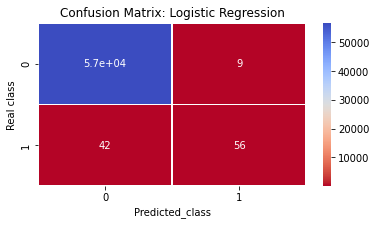


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.57      0.69        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Your Code Here
y_pred = logisticRegression.predict(cleaned_df_x_test)
confusion_matrix_lr = confusion_matrix(cleaned_df_y_test, y_pred)
fig= plt.figure(figsize=(6,3))
print("TP",confusion_matrix_lr[1,1,])
print("TN",confusion_matrix_lr[0,0])
print("FP",confusion_matrix_lr[0,1])
print("FN",confusion_matrix_lr[1,0])
sns.heatmap(confusion_matrix_lr,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()
print("\nClassification Report")
print(classification_report(cleaned_df_y_test,y_pred))

TP 90
TN 54526
FP 2338
FN 8


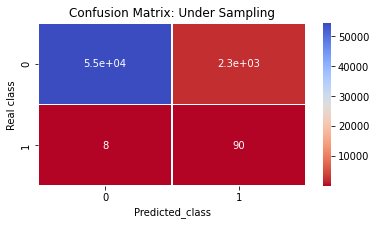


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [ ]:
pred_under = lr_under.predict(cleaned_df_x_test)
confusion_matrix_under = confusion_matrix(cleaned_df_y_test, pred_under)
fig= plt.figure(figsize=(6,3))
print("TP",confusion_matrix_under[1,1,])
print("TN",confusion_matrix_under[0,0]) 
print("FP",confusion_matrix_under[0,1]) 
print("FN",confusion_matrix_under[1,0]) 
sns.heatmap(confusion_matrix_under,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Confusion Matrix: Under Sampling")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()
print("\nClassification Report")
print(classification_report(cleaned_df_y_test,pred_under))

TP 90
TN 55471
FP 1393
FN 8


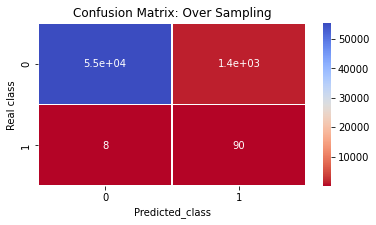


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [ ]:
pred_over = lr_over.predict(cleaned_df_x_test)
confusion_matrix_over = confusion_matrix(cleaned_df_y_test, pred_over)
fig= plt.figure(figsize=(6,3))
print("TP",confusion_matrix_over[1,1,]) 
print("TN",confusion_matrix_over[0,0]) 
print("FP",confusion_matrix_over[0,1]) 
print("FN",confusion_matrix_over[1,0]) 
sns.heatmap(confusion_matrix_over,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Confusion Matrix: Over Sampling")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()
print("\nClassification Report")
print(classification_report(cleaned_df_y_test,pred_over))

TP 90
TN 55384
FP 1480
FN 8


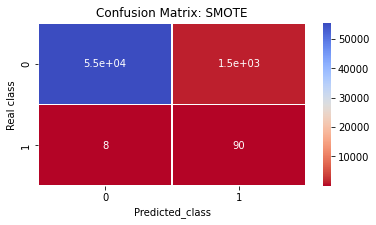


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [ ]:
pred_smote = lr_smote.predict(cleaned_df_x_test)
confusion_matrix_smote = confusion_matrix(cleaned_df_y_test, pred_smote)
fig= plt.figure(figsize=(6,3))
print("TP",confusion_matrix_smote[1,1,]) 
print("TN",confusion_matrix_smote[0,0]) 
print("FP",confusion_matrix_smote[0,1]) 
print("FN",confusion_matrix_smote[1,0]) 
sns.heatmap(confusion_matrix_smote,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Confusion Matrix: SMOTE")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()
print("\nClassification Report")
print(classification_report(cleaned_df_y_test,pred_smote))

##Comment on the Confusion Matrices

For fraud detection, we need to ensure a high recall rather than precision. For a basic Logistic Regression model, we see a higher number of False Negatives (42) which drops to a lower value (8) with Undersampling, Oversampling, and SMOTE. Hence, these models are better. Since the value of FNs is same in these 3, we compare these 3 on the basis of average precision which we measured for all models in the code above and SMOTE gives the best average precision, hence, to conclude, SMOTE gives the best performance.

**Q9. Plot the ROC for all four models above in a single plot. Make sure to label the axes and legend. Comment on your result.**

In [ ]:
print(result_table)

            classifiers                                                fpr  \
0   Logistic Regression  [0.0, 0.0, 0.0, 0.0, 1.758581879572313e-05, 1....   
1  Random Under Sampler  [0.0, 0.00010551491277433877, 0.00014068655036...   
2   Random Over Sampler  [0.0, 0.00014068655036578504, 0.00014068655036...   
3                 SMOTE  [0.0, 0.00014068655036578504, 0.00014068655036...   

                                                 tpr       auc  
0  [0.0, 0.01020408163265306, 0.1836734693877551,...  0.976475  
1  [0.0, 0.29591836734693877, 0.29591836734693877...  0.980357  
2  [0.0, 0.3673469387755102, 0.40816326530612246,...  0.979499  
3  [0.0, 0.3673469387755102, 0.41836734693877553,...  0.979027  


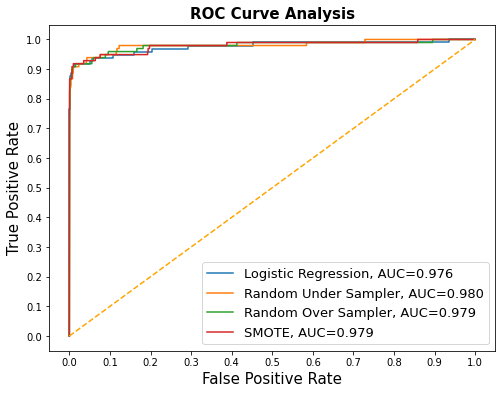

In [ ]:
# Your Code Here

result_table.set_index('classifiers', inplace=True)
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

## Comment on the Result

As seen from the above plots, the RandomUnderSampler has the maximum area under the curve (0.980) in the ROC plot. Hence, from this analysis, we can estimate that RandomUnderSampler performs better than the other models, although SMOTE and RandomOverSampler come a close second with 0.979 AUC.

**Q10. Plot the precision-recall curve for all four models above in a single plot. Make sure to label the axes and legend. Comment on your result.**

In [38]:
# Your Code Here

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

Text(0.5, 1.0, 'Precision Recall Curve')

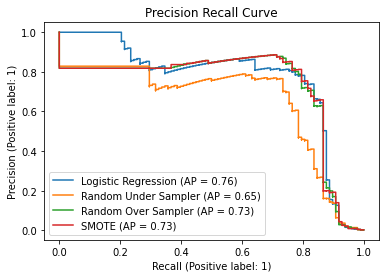

In [ ]:
plot_precision_recall_curve(logisticRegression, cleaned_df_x_test, cleaned_df_y_test, ax = plt.gca(),name = "Logistic Regression")
plot_precision_recall_curve(lr_under, cleaned_df_x_test, cleaned_df_y_test, ax = plt.gca(),name = "Random Under Sampler")
plot_precision_recall_curve(lr_over, cleaned_df_x_test, cleaned_df_y_test, ax = plt.gca(),name = "Random Over Sampler")
plot_precision_recall_curve(lr_smote, cleaned_df_x_test, cleaned_df_y_test, ax = plt.gca(),name = "SMOTE")
plt.title('Precision Recall Curve')

## Comment on the Result

As seen from the above Precision Recall curve, the Average precision is the best in the basic Logistic Regression model (0.76) with multiple thresholds.

**Q11. Adding class weights to a logistic regression model. Print the AUC and average precision of 5-fold cross validation. Also, plot its confusion matrix on test set.**

In [35]:
# Your Code Here
lr_weighted = LogisticRegression(class_weight='balanced')
lr_weighted.fit(cleaned_df_x_dev, cleaned_df_y_dev)

LogisticRegression(class_weight='balanced')

In [36]:
y_pred_proba_weighted = lr_weighted.predict_proba(cleaned_df_x_test)
fpr, tpr, thresholds = metrics.roc_curve(cleaned_df_y_test, y_pred_proba_weighted[:,1], pos_label=1)
weighted_table = weighted_table.append({'classifiers':"Weighted Logistic Regression",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':metrics.auc(fpr, tpr)}, ignore_index=True)

print ("AUC = ", metrics.auc(fpr, tpr))

AUC =  0.9795895039219964


In [40]:
score = cross_validate(lr_weighted, cleaned_df_x_dev, cleaned_df_y_dev, cv=5, scoring=['roc_auc','average_precision'])
print ("AUC of 5-fold CV = ", score['test_roc_auc'].mean())

AUC of 5-fold CV =  0.9767058445360919


In [41]:
print ("Average Precision of 5-fold CV = ", score['test_average_precision'].mean())

Average Precision of 5-fold CV =  0.7509550474845972


TP 90
TN 55487
FP 1377
FN 8


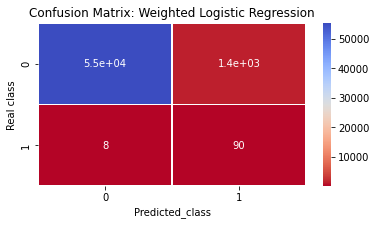


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [45]:
y_pred_weighted = lr_weighted.predict(cleaned_df_x_test)
confusion_matrix_lr_weighted = confusion_matrix(cleaned_df_y_test, y_pred_weighted)
fig= plt.figure(figsize=(6,3))
print("TP",confusion_matrix_lr_weighted[1,1,]) 
print("TN",confusion_matrix_lr_weighted[0,0]) 
print("FP",confusion_matrix_lr_weighted[0,1]) 
print("FN",confusion_matrix_lr_weighted[1,0]) 
sns.heatmap(confusion_matrix_lr_weighted,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Confusion Matrix: Weighted Logistic Regression")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()
print("\nClassification Report")
print(classification_report(cleaned_df_y_test,y_pred_weighted))

**Q12. Plot the ROC and the precision-recall curve for default Logistic without any sampling method and this balanced Logistic model in two single plots. Make sure to label the axes and legend. Comment on your result.**

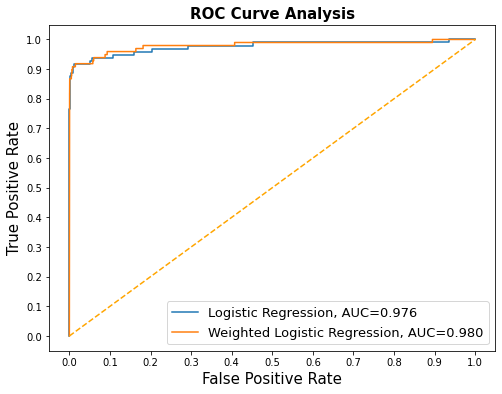

In [46]:
weighted_table.set_index('classifiers', inplace=True)
fig = plt.figure(figsize=(8,6))

for i in weighted_table.index:
    plt.plot(weighted_table.loc[i]['fpr'], 
             weighted_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, weighted_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


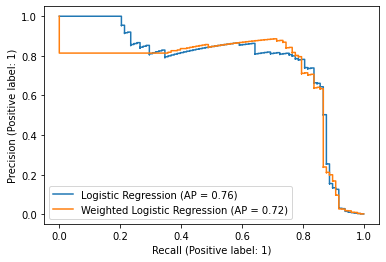

In [47]:
plot_precision_recall_curve(logisticRegression, cleaned_df_x_test, cleaned_df_y_test, ax = plt.gca(),name = "Logistic Regression")
plot_precision_recall_curve(lr_weighted, cleaned_df_x_test, cleaned_df_y_test, ax = plt.gca(),name = "Weighted Logistic Regression")

## Comment on the Result

After adding class weights to the Logistic Regression model, we find that the AUC improves and Average precision decreases as compared to the basic Logistic Regression which is expected because this is an imbalanced dataset and as seen from the above plots and confusion matrices, we have better performance with SMOTE, RandomOverSampler, and RandomUnderSampler models

## Part 2: Unsupervised Learning

In this part, we will be applying unsupervised learning approaches to a problem in computational biology. Specifically, we will be analyzing single-cell genomic sequencing data. Single-cell genomics is a set of revolutionary new technologies which can profile the genome of a specimen (tissue, blood, etc.) at the resolution of individual cells. This increased granularity can help capture intercellular heterogeneity, key to better understanding and treating complex genetic diseases such as cancer and Alzheimer's. 

<img src="https://cdn.10xgenomics.com/image/upload/v1574196658/blog/singlecell-v.-bulk-image.png" width="800px"/>

<center>Source: 10xgenomics.com/blog/single-cell-rna-seq-an-introductory-overview-and-tools-for-getting-started</center>

A common challenge of genomic datasets is their high-dimensionality: a single observation (a cell, in the case of single-cell data) may have tens of thousands of gene expression features. Fortunately, biology offers a lot of structure - different genes work together in pathways and are co-regulated by gene regulatory networks. Unsupervised learning is widely used to discover this intrinsic structure and prepare the data for further analysis.

### Dataset: single-cell RNASeq of mouse brain cells

We will be working with a single-cell RNASeq dataset of mouse brain cells. In the following gene expression matrix, each row represents a cell and each column represents a gene. Each entry in the matrix is a normalized gene expression count - a higher value means that the gene is expressed more in that cell. The dataset has been pre-processed using various quality control and normalization methods for single-cell data. 

Data source is on Coursework.

In [ ]:
cell_gene_counts_df = pd.read_csv('mouse_brain_cells_gene_counts.csv', index_col='cell')
cell_gene_counts_df

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B14Rik,0610009B22Rik,0610009D07Rik,...,Zwint,Zxda,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6
cell,,,,,,,,,,,,,,,,,,,,,
A1.B003290.3_38_F.1.1,-0.08093,0.7856,1.334,-0.2727,-0.4153,-0.8310,-0.4692,-0.03146,-0.6035,-1.021000,...,-0.7227,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,-0.553,-0.5654,-0.04385,1.567
A1.B003728.3_56_F.1.1,-0.08093,-1.4840,-0.576,-0.2727,-0.4153,1.8350,-0.4692,-0.03146,-0.6035,-1.021000,...,-0.7227,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,-0.553,-0.5654,-0.04385,-0.681
A1.MAA000560.3_10_M.1.1,-0.08093,0.6300,-0.576,-0.2727,-0.4153,-0.2084,-0.4692,-0.03146,-0.6035,1.253000,...,1.3150,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,2.072,-0.5654,-0.04385,1.260
A1.MAA000564.3_10_M.1.1,-0.08093,0.3809,1.782,-0.2727,-0.4153,1.0300,-0.4692,-0.03146,1.2640,-1.021000,...,-0.7227,-0.2145,-0.1927,-0.4163,-0.5923,2.3900,-0.553,0.1697,-0.04385,-0.681
A1.MAA000923.3_9_M.1.1,-0.08093,0.5654,-0.576,-0.2727,-0.4153,-0.8310,-0.4692,-0.03146,-0.6035,-1.021000,...,-0.7227,-0.2145,-0.1927,-0.4163,2.3180,-0.5913,-0.553,-0.5654,-0.04385,-0.681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E2.MAA000902.3_11_M.1.1,14.98400,1.1550,-0.576,-0.2727,-0.4153,0.7530,-0.4692,-0.03146,-0.6035,-1.021000,...,1.4260,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,-0.553,-0.5654,-0.04385,1.728
E2.MAA000926.3_9_M.1.1,-0.08093,-1.4840,-0.576,-0.2727,-0.4153,1.4720,-0.4692,-0.03146,1.8120,1.079000,...,-0.7227,-0.2145,-0.1927,-0.4163,0.2422,-0.5913,-0.553,1.6060,-0.04385,-0.681
E2.MAA000932.3_11_M.1.1,-0.08093,0.5703,-0.576,-0.2727,-0.4153,-0.8310,-0.4692,-0.03146,-0.6035,-0.003473,...,-0.7227,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,-0.553,-0.5654,-0.04385,2.074


Note the dimensionality - we have 1000 cells (observations) and 18,585 genes (features)!

We are also provided a metadata file with annotations for each cell (e.g. cell type, subtissue, mouse sex, etc.)

In [ ]:
cell_metadata_df = pd.read_csv('mouse_brain_cells_metadata.csv')
cell_metadata_df

,cell,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode,n_genes,n_counts
0,A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290,3359,390075.0
1,A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728,1718,776436.0
2,A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560,3910,1616084.0
3,A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564,4352,360004.0
4,A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923,2248,290282.0
...,...,...,...,...,...,...,...,...
995,E2.MAA000902.3_11_M.1.1,astrocyte,Striatum,M,3_11_M,MAA000902,3026,3134463.0
996,E2.MAA000926.3_9_M.1.1,oligodendrocyte,Cortex,M,3_9_M,MAA000926,3085,744301.0
997,E2.MAA000932.3_11_M.1.1,endothelial cell,Hippocampus,M,3_11_M,MAA000932,2277,519257.0
998,E2.MAA000944.3_9_M.1.1,oligodendrocyte,Cortex,M,3_9_M,MAA000944,3234,1437895.0


Different cell types

In [ ]:
cell_metadata_df['cell_ontology_class'].value_counts()

oligodendrocyte                   385
endothelial cell                  264
astrocyte                         135
neuron                             94
brain pericyte                     58
oligodendrocyte precursor cell     54
Bergmann glial cell                10
Name: cell_ontology_class, dtype: int64

Different subtissue types (parts of the brain)

In [ ]:
cell_metadata_df['subtissue'].value_counts()

Cortex         364
Hippocampus    273
Striatum       220
Cerebellum     143
Name: subtissue, dtype: int64

Our goal in this exercise is to use dimensionality reduction and clustering to visualize and better understand the high-dimensional gene expression matrix. We will use the following pipeline, which is common in single-cell analysis:
1. Use PCA to project the gene expression matrix to a lower-dimensional linear subspace.
2. Cluster the data using K-means on the first 20 principal components.
3. Use t-SNE to project the first 20 principal components onto two dimensions. Visualize the points and color by their clusters from (2).

## 1 PCA

**Q1. Perform PCA and project the gene expression matrix onto its first 50 principal components. You may use `sklearn.decomposition.PCA`.**

In [ ]:
### Your code here

from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=50)
cell_gene_counts_df_pc = pca.fit_transform(cell_gene_counts_df)
print(pca.explained_variance_ratio_)

[0.0405364  0.03156748 0.01910907 0.01397164 0.01275764 0.01180086
 0.01103546 0.01050517 0.00832349 0.00679308 0.00648963 0.00586843
 0.00494591 0.0043089  0.00375794 0.00354049 0.00340644 0.00301206
 0.00300183 0.00292096 0.00271566 0.00266192 0.00258518 0.00253791
 0.00251885 0.00249136 0.00244835 0.00240565 0.00239021 0.00238915
 0.00234027 0.00232245 0.0022816  0.00227566 0.00224628 0.0022384
 0.00222031 0.00219288 0.0021799  0.00215759 0.00213969 0.00208329
 0.00206611 0.00204558 0.0020341  0.00202211 0.00196336 0.0019586
 0.00191154 0.00187275]


In [ ]:
print(cell_gene_counts_df.shape)
print(cell_gene_counts_df_pc.shape)
cell_gene_counts_df_pc

(1000, 18585)
(1000, 50)


array([[ 15.35396678,  22.55144076,  28.90956798, ..., -13.34091999,
         -1.26482376,  -3.72720808],
       [-19.09278906,  -3.01118854,  37.07301552, ...,  -0.27328516,
         -0.99627147,   0.06128728],
       [  1.62402553, -26.09383155,  -8.73588168, ...,  -0.22017202,
          0.22354336,  -0.48544962],
       ...,
       [-28.40142789,  19.68117984,  -7.70460083, ...,  -2.01933811,
         -0.51779935,   4.22880007],
       [  4.02961362, -30.03800882,  -7.42685359, ...,  -0.2020735 ,
         -0.2749232 ,   0.96996787],
       [  5.27611825, -25.24616672, -12.5235741 , ...,   0.04701307,
          0.45480324,  -0.50344711]])

**Q2. Plot the cumulative proportion of variance explained as a function of the number of principal components. How much of the total variance in the dataset is explained by the first 20 principal components?**

In [ ]:
import seaborn as sns

Text(0, 0.5, '% of Variance Explained')

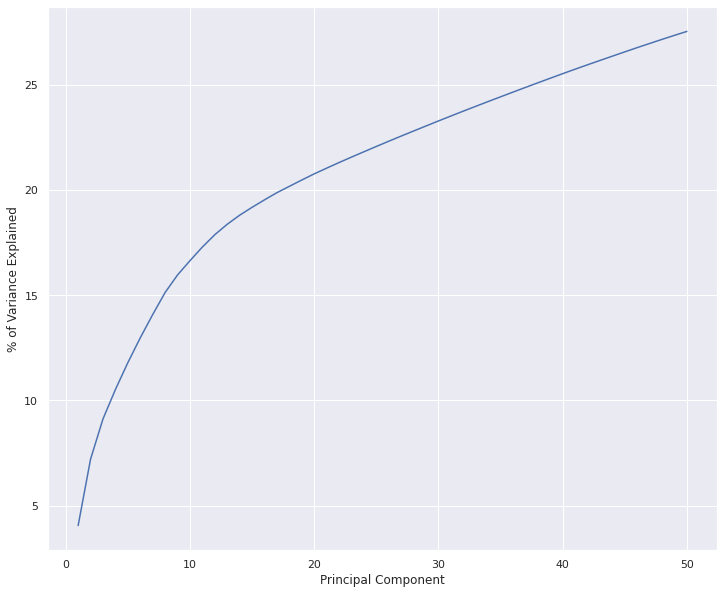

In [ ]:
sns.set()
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1)
plt.plot(np.arange(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum()*100)
ax.set_xlabel("Principal Component")
ax.set_ylabel("% of Variance Explained")

## Variance from the first 20 components

From the above plot, we can approximate the variance explained by the first 20 components to 21-22%.

**Q3. For the first principal component, report the top 10 loadings (weights) and their corresponding gene names.** In other words, which 10 genes are weighted the most in the first principal component?

In [ ]:
### Your code here

result = list(zip(abs(pca.components_[0]), cell_gene_counts_df.columns))
result.sort(reverse=True)
result[:10]

[(0.02667315589567776, 'Nsg2'),
 (0.02659467605043545, 'St8sia3'),
 (0.026588009462635096, 'Ptpn5'),
 (0.026539238170822797, 'Kcnj4'),
 (0.026347482125622292, 'Rasgef1a'),
 (0.026220752380441237, 'Camkv'),
 (0.026173114004570876, 'Hpca'),
 (0.02602184941114533, 'Cpne5'),
 (0.025978972936075626, 'Nrsn2'),
 (0.025852558650022887, 'Erc2')]

**Q4. Plot the projection of the data onto the first two principal components using a scatter plot.**

Text(0.5, 1.0, 'Projection of Data')

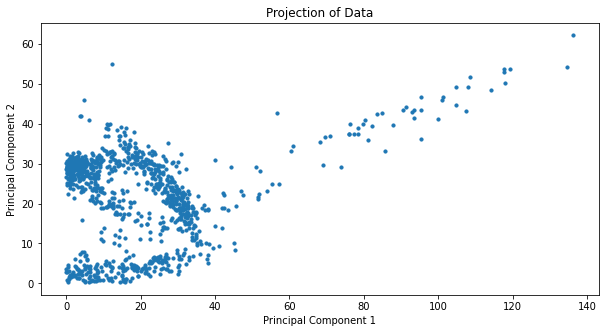

In [ ]:
### Your code here

plt.figure(figsize=(10,5))
plt.scatter(abs(cell_gene_counts_df_pc[:,0]), abs(cell_gene_counts_df_pc[:,1]),s=10)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Projection of Data")

**Q5. Now, use a small multiple of four scatter plots to make the same plot as above, but colored by four annotations in the metadata: cell_ontology_class, subtissue, mouse.sex, mouse.id. Include a legend for the labels.** For example, one of the plots should have points projected onto PC 1 and PC 2, colored by their cell_ontology_class.

<Figure size 720x360 with 0 Axes>

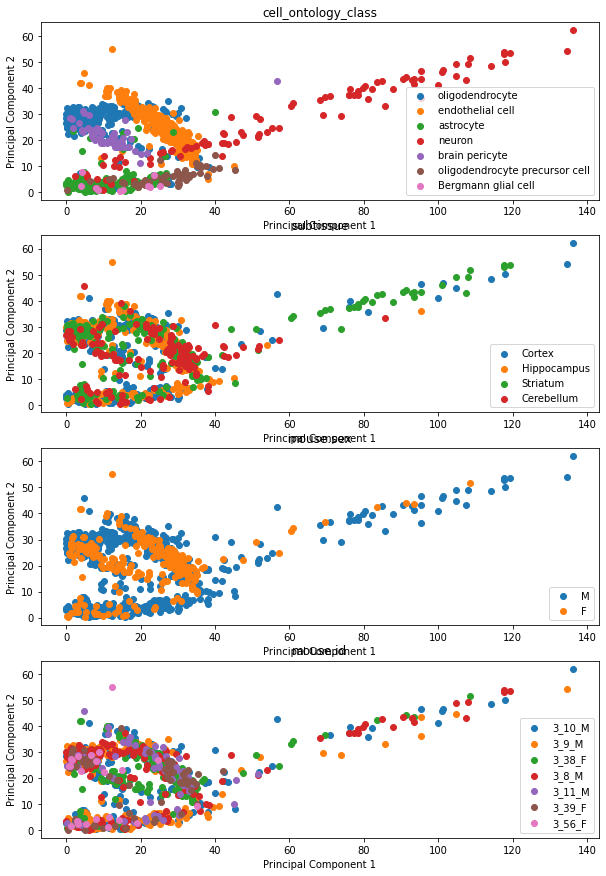

In [ ]:
### Your code here

figure = plt.figure (figsize=(10,5))
figure, ax = plt.subplots(4,1, figsize=(10,15))
j=0
for i in ['cell_ontology_class','subtissue','mouse.sex','mouse.id']:
  classes = cell_metadata_df[i].values
  pca_abs = abs(cell_gene_counts_df_pc)
  for class_ in cell_metadata_df[i].value_counts().index:
    ax[j].scatter(pca_abs[classes.flatten() == class_,0], pca_abs[classes.flatten() == class_, 1], label=class_)
  ax[j].set_title(i)
  ax[j].set_xlabel("Principal Component 1")
  ax[j].set_ylabel("Principal Component 2")
  ax[j].legend(loc="lower right")

  j += 1

**Q6. Based on the plots above, the first two principal components correspond to which aspect of the cells? What is the intrinsic dimension that they are describing?**

In [ ]:
### Your answer here

# From the first 2 components, the cell_ontology_class is the intrinsic 
# dimension they are describing because as seen from the above plots, points in the same
# color are clustered together as compared to the other plots.

## 2 K-means

While the annotations provide high-level information on cell type (e.g. cell_ontology_class has 7 categories), we may also be interested in finding more granular subtypes of cells. To achieve this, we will use K-means clustering to find a large number of clusters in the gene expression dataset. Note that the original gene expression matrix had over 18,000 noisy features, which is not ideal for clustering. So, we will perform K-means clustering on the first 20 principal components of the dataset.

**Q7. Implement a `kmeans` function which takes in a dataset `X` and a number of clusters `k`, and returns the cluster assignment for each point in `X`. You may NOT use sklearn for this implementation. Use lecture 6, slide 14 as a reference.**

In [ ]:
from scipy.spatial import distance

In [ ]:
def kmeans(X, k, iters=10):
    '''Groups the points in X into k clusters using the K-means algorithm.

    Parameters
    ----------
    X : (m x n) data matrix
    k: number of clusters
    iters: number of iterations to run k-means loop

    Returns
    -------
    y: (m x 1) cluster assignment for each point in X
    '''
    ### Your code here

    index = np.random.choice(len(X), k, replace=False)
    centroids = X[index, :]
    points = np.argmin(distance.cdist(X, centroids, 'euclidean'), axis = 1)

    for _ in range (iters):
      centroids = np.vstack([X[points==i,:].mean(axis=0)for i in range (k)])
      c_min = np.argmin(distance.cdist(X, centroids, 'euclidean'), axis = 1)
      points = c_min

    return points

Before applying K-means on the gene expression data, we will test it on the following synthetic dataset to make sure that the implementation is working.

Text(0, 0.5, '$x_2$')

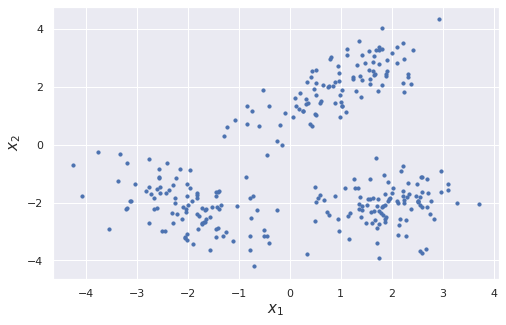

In [ ]:
np.random.seed(0)
x_1 = np.random.multivariate_normal(mean=[1, 2], cov=np.array([[0.8, 0.6], [0.6, 0.8]]), size=100)
x_2 = np.random.multivariate_normal(mean=[-2, -2], cov=np.array([[0.8, -0.4], [-0.4, 0.8]]), size=100)
x_3 = np.random.multivariate_normal(mean=[2, -2], cov=np.array([[0.4, 0], [0, 0.4]]), size=100)
X = np.vstack([x_1, x_2, x_3])

plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)

**Q8. Apply K-means with k=3 to the synthetic dataset above. Plot the points colored by their K-means cluster assignments to verify that your implementation is working.**

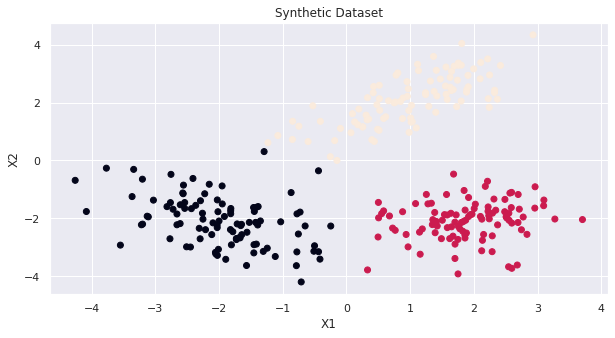

In [ ]:
### Your code here

points = kmeans(X,3)
plt.figure(figsize=(10,5))
plt.scatter(X[:,0], X[:,1], c=points)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Synthetic Dataset")
plt.show()

**Q9. Use K-means with k=20 to cluster the first 20 principal components of the gene expression data.**

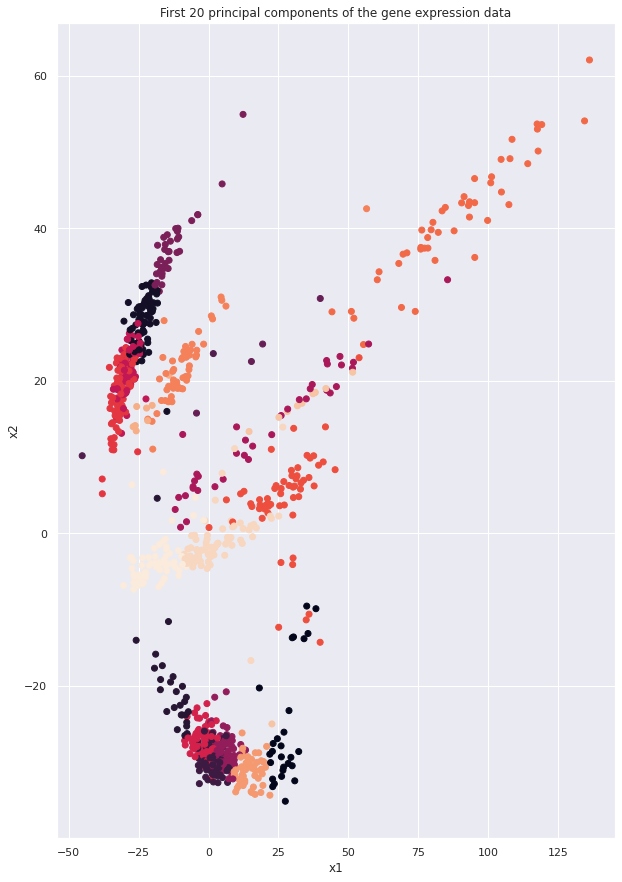

In [ ]:
### Your code here

x = cell_gene_counts_df_pc[:,:20]
point = kmeans (x,20)
plt.figure(figsize=(10,15))
plt.scatter(x[:,0], x[:,1], c=point)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("First 20 principal components of the gene expression data")
plt.show()

## 3 t-SNE

In this final section, we will visualize the data again using t-SNE - a non-linear dimensionality reduction algorithm. You can learn more about t-SNE in this interactive tutorial: https://distill.pub/2016/misread-tsne/.

**Q10. Use t-SNE to reduce the first 20 principal components of the gene expression dataset to two dimensions. You may use `sklearn.manifold.TSNE`.** Note that it is recommended to first perform PCA before applying t-SNE to suppress noise and speed up computation.

In [ ]:
### Your code here
from sklearn.manifold import TSNE

In [ ]:
pca_20 = PCA(n_components=20)
cell_gene_counts_df_pc_20 = pca_20.fit_transform(cell_gene_counts_df)
TSNE_result = TSNE(n_components=2, init='random').fit_transform(cell_gene_counts_df_pc_20)
print(TSNE_result)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[[ -0.15542242  -3.703492  ]
 [  3.0864155    3.194824  ]
 [ -6.5107565  -30.475853  ]
 ...
 [ 20.399393    37.945232  ]
 [-16.51781    -39.76391   ]
 [-11.301466   -27.295435  ]]


**Q11. Plot the data (first 20 principal components) projected onto the first two t-SNE dimensions.**

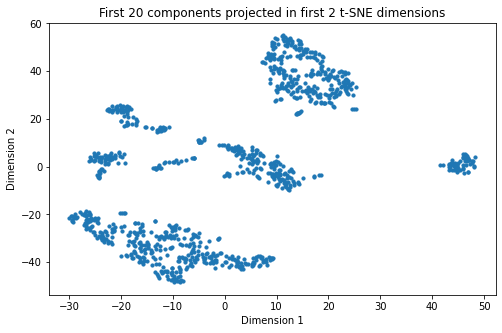

In [ ]:
### Your code here

plt.figure (figsize=(8,5))
plt.scatter(TSNE_result[:,0], TSNE_result[:,1], s=10)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("First 20 components projected in first 2 t-SNE dimensions")
plt.show()

**Q12. Plot the data (first 20 principal components) projected onto the first two t-SNE dimensions, with points colored by their cluster assignments from part 2.**

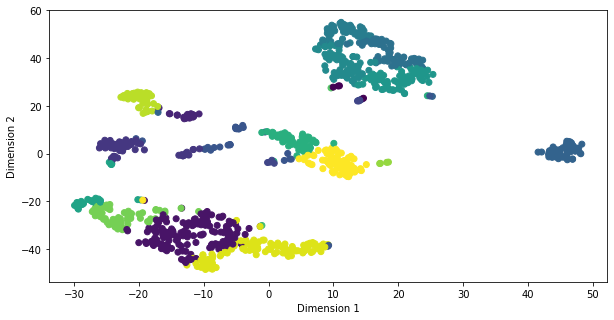

In [ ]:
### Your code here

points = kmeans(cell_gene_counts_df_pc[:,:20],20)
plt.figure(figsize=(10,5))
plt.scatter(TSNE_result[:,0], TSNE_result[:,1], c=points)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

**Q13. Why is there overlap between points in different clusters in the t-SNE plot above?**

In [ ]:
### Your answer here

# As seen from the plot in Q12, there are around 5-6 clusters. In the KMeans
# portion, there were 20 (k=20) clusters. So, here each individual cluster is
# getting partitioned into smaller clusters to accomodate a total of 20 clusters
# although actually there should not be 20 clusters, therefore causing an 
# overlap.

These 20 clusters may correspond to various cell subtypes or cell states. They can be further investigated and mapped to known cell types based on their gene expressions (e.g. using the K-means cluster centers). The clusters may also be used in downstream analysis. For instance, we can monitor how the clusters evolve and interact with each other over time in response to a treatment.